In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [4]:
import sys
sys.path.append('/home/jupyter/AdaptationAnalysis/')

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF


In [6]:
# settings 
#for mean temp
variable = 'tasmax'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 

# max temp
# variable = 'tasmax'
# models = ['MIROC6'] 

#for precip - still having issues getting EC-Earth data 
# variable = 'pr'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [7]:
regions_dict = {
    'USeast': {'lat': 41.3, 'lon': -72.5},
    'USwest':  {'lat': 37.7, 'lon': -122.4, },
    'iceland':  {'lat': 65, 'lon': -19},
    'europe':  {'lat': 51, 'lon': 10.5},
    'australia': {'lat': -25.2, 'lon': 133.7},
    'tropics': {'lat': 3.9, 'lon': -53.1}
}

In [8]:
region = 'USeast'
USeast = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_41.3_287.5.zarr


In [9]:
region ='USwest'
USwest = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_37.7_237.6.zarr


In [10]:
region ='iceland'
iceland = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_65_341.zarr


In [11]:
region ='europe'
europe = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_51_10.5.zarr


In [12]:
region ='australia'
australia = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_-25.2_133

In [13]:
region ='tropics'
tropics = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmax_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmax_3.9_306.9.zarr


In [14]:
def quantile_occurance(parameter,region,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        _, internal = region.quantile_occurance(**args)
        internal = internal.resample(time='AS').mean().rolling(
            time=10, center=True).mean()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = dataset.mean('member')
        
    return dataset

In [15]:
def sensitivity_test(parameter,region,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        internal = region.extreme_internal_variability(**args)
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = dataset.model_le/dataset.total_le
        
    return dataset

In [16]:
from copy import deepcopy
def sensitivity_allregions(parameter, args, regions):
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions_str = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions_str})
    
    return final_dataset

In [17]:
def extreme_internal_allregions(args, regions):
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions_str = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions_str})
    return final_dataset

In [18]:
test_histslice_false = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':False},
                                        regions = [USwest,europe,australia,tropics]
                                       )

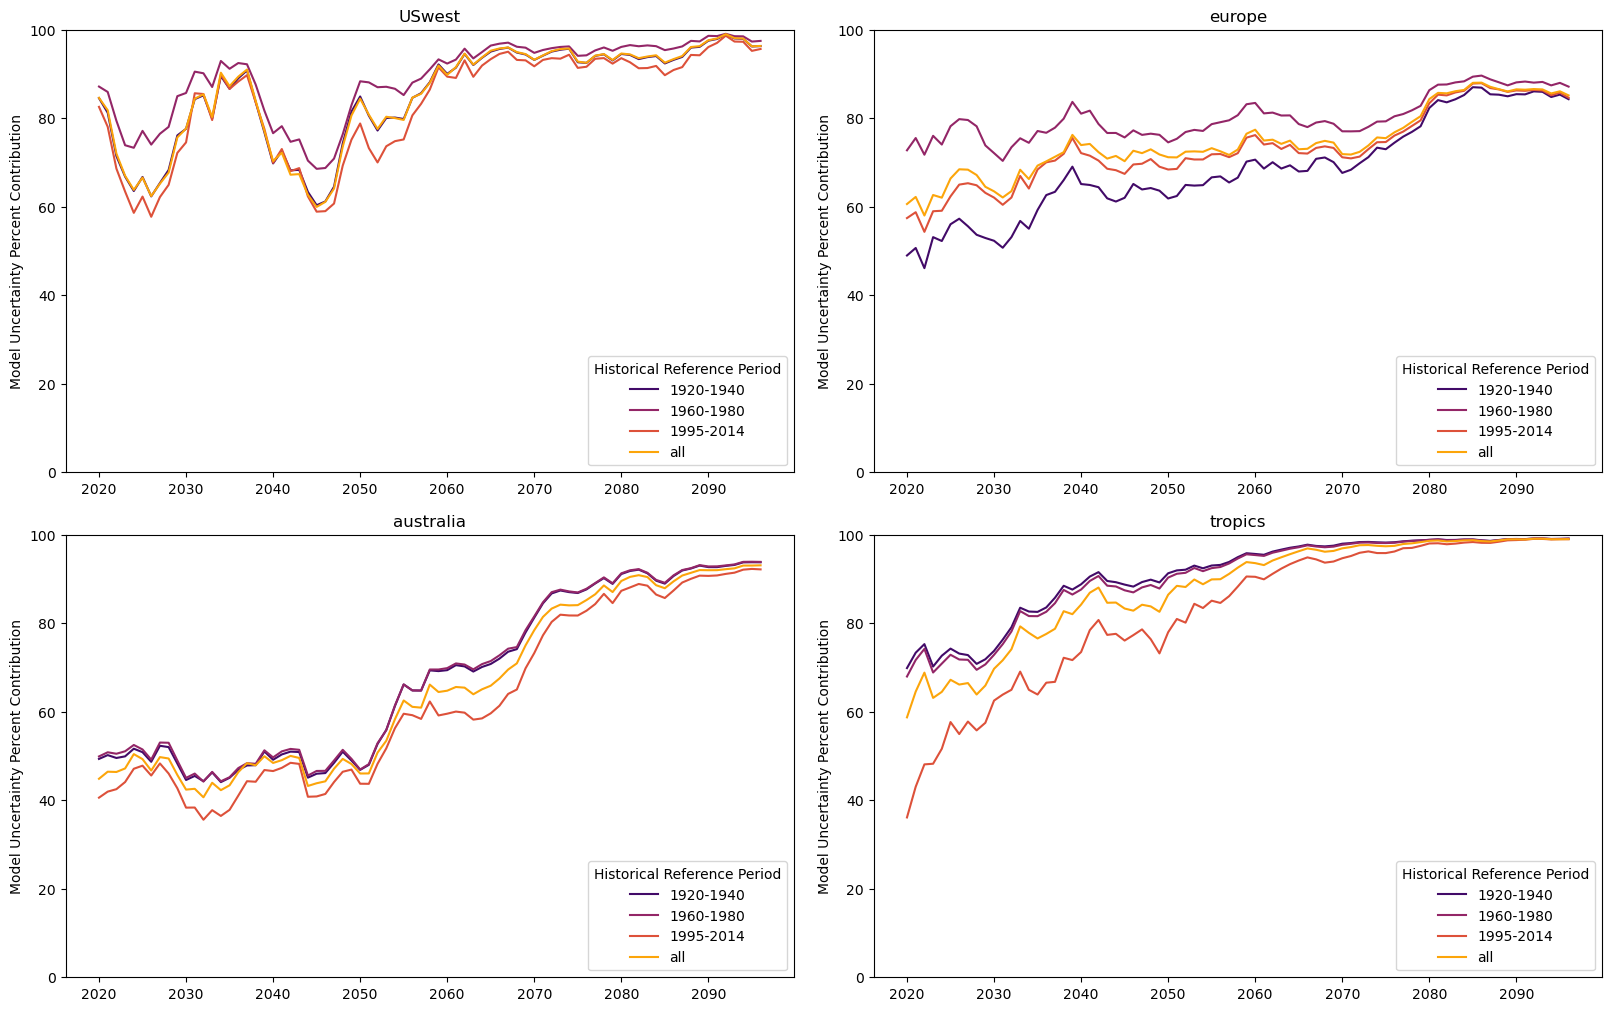

In [99]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_false.concat_dim))
labels = ['1920-1940','1960-1980','1995-2014','all']

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_false.concat_dim)):
        axe.plot(test_histslice_false.sel(region=r).isel(concat_dim=i).time,test_histslice_false.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [20]:
test_histslice_true = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':True},
                                        regions = [USwest,europe,australia,tropics]
                                       )

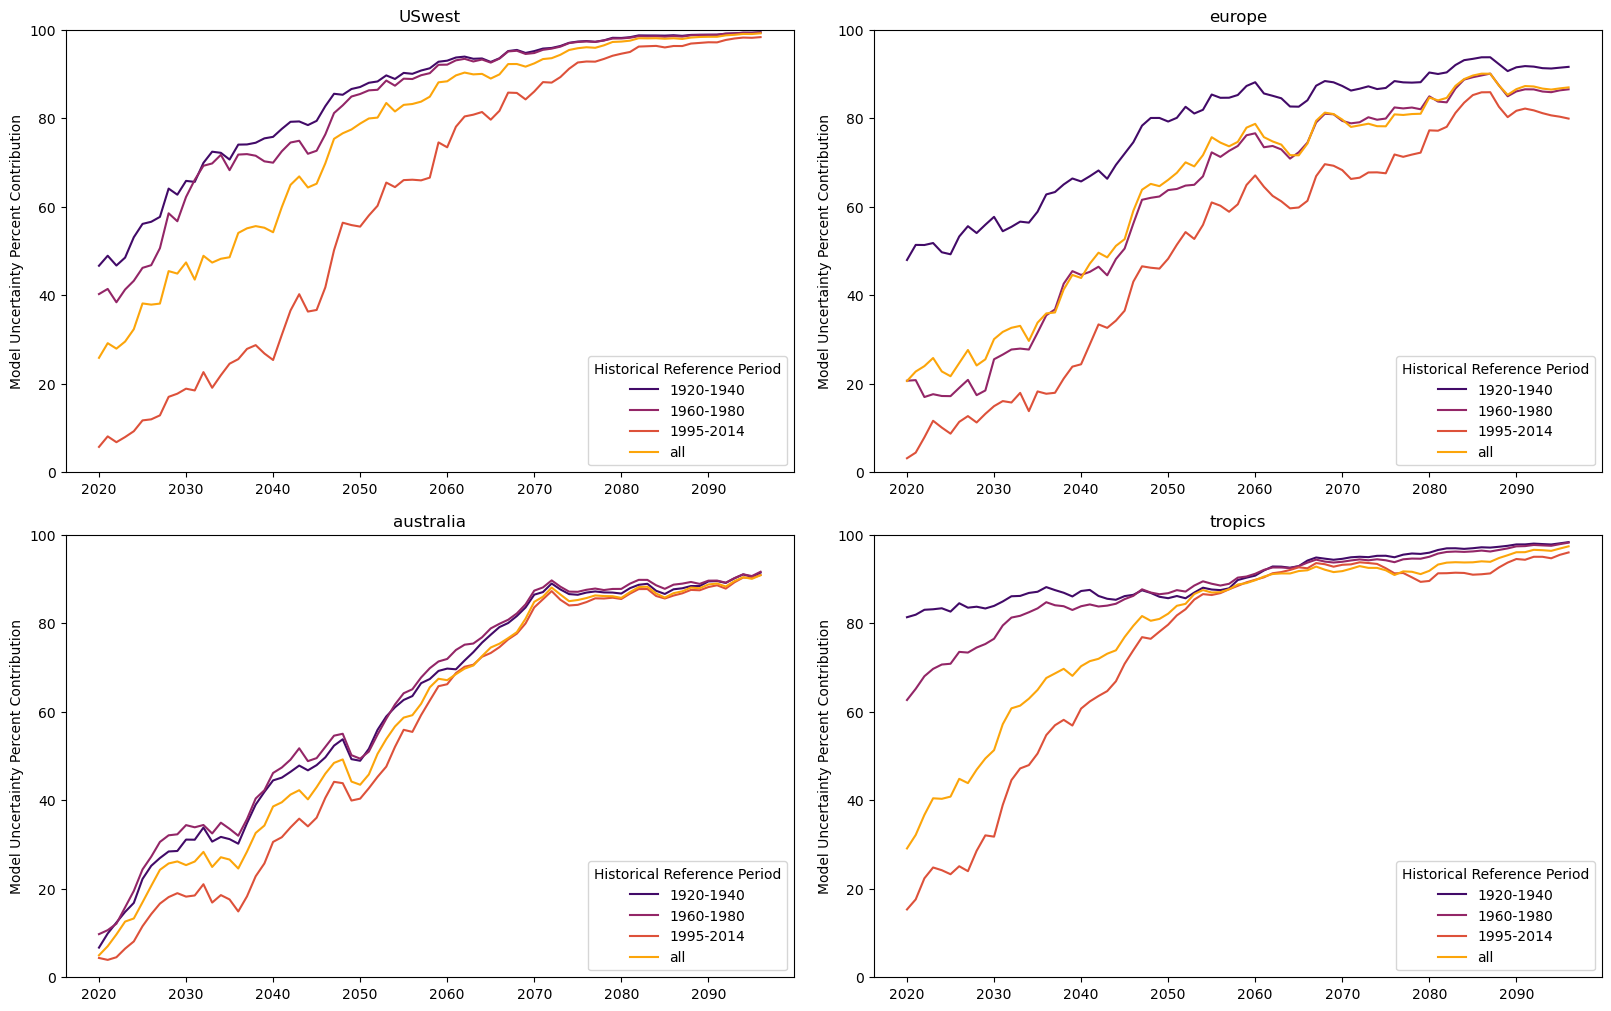

In [100]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_true.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_true.concat_dim)):
        axe.plot(test_histslice_true.sel(region=r).isel(concat_dim=i).time,test_histslice_true.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [23]:
region = 'USeast'
USeast_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [43]:
region = 'USwest'
USwest_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [25]:
region = 'iceland'
iceland_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [44]:
region = 'europe'
europe_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [47]:
region = 'australia'
australia_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [48]:
region = 'tropics'
tropics_qdm = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'],
                                 bucket='climateai_data_repository', path='tmp/internal_variability/era_files', name = region,
                                 load=True)

In [49]:
test_histslice_qdm = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':False},
                                        regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]
                                       )

In [42]:
USwest_qdm.future.sel(model='CanESM5')

<xarray.Dataset>
Dimensions:    (member: 58, time: 31411)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (member) <U9 'r16i1p2f1' 'r10i1p1f1' 'r11i1p2f1' ... 'nan' 'nan'
    model      <U13 'CanESM5'
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
Data variables:
    tasmax     (member, time) float64 15.37 15.69 15.26 15.28 ... nan nan nan

In [40]:
data

<xarray.DataArray (member: 58, time: 31411)>
array([[15.37443286, 15.69419883, 15.26467896, ..., 21.36703491,
        20.86658454, 20.41395113],
       [14.40981506, 14.63600183, 15.14656623, ..., 20.69319324,
        20.70234218, 20.49350701],
       [14.86775592, 16.14417809, 16.33033269, ..., 18.46798706,
        18.35628438, 18.33939266],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    member_id  (member) object 'r16i1p2f1' 'r10i1p1f1' 'r11i1p2f1' ... nan nan
    model      <U13 'CanESM5'

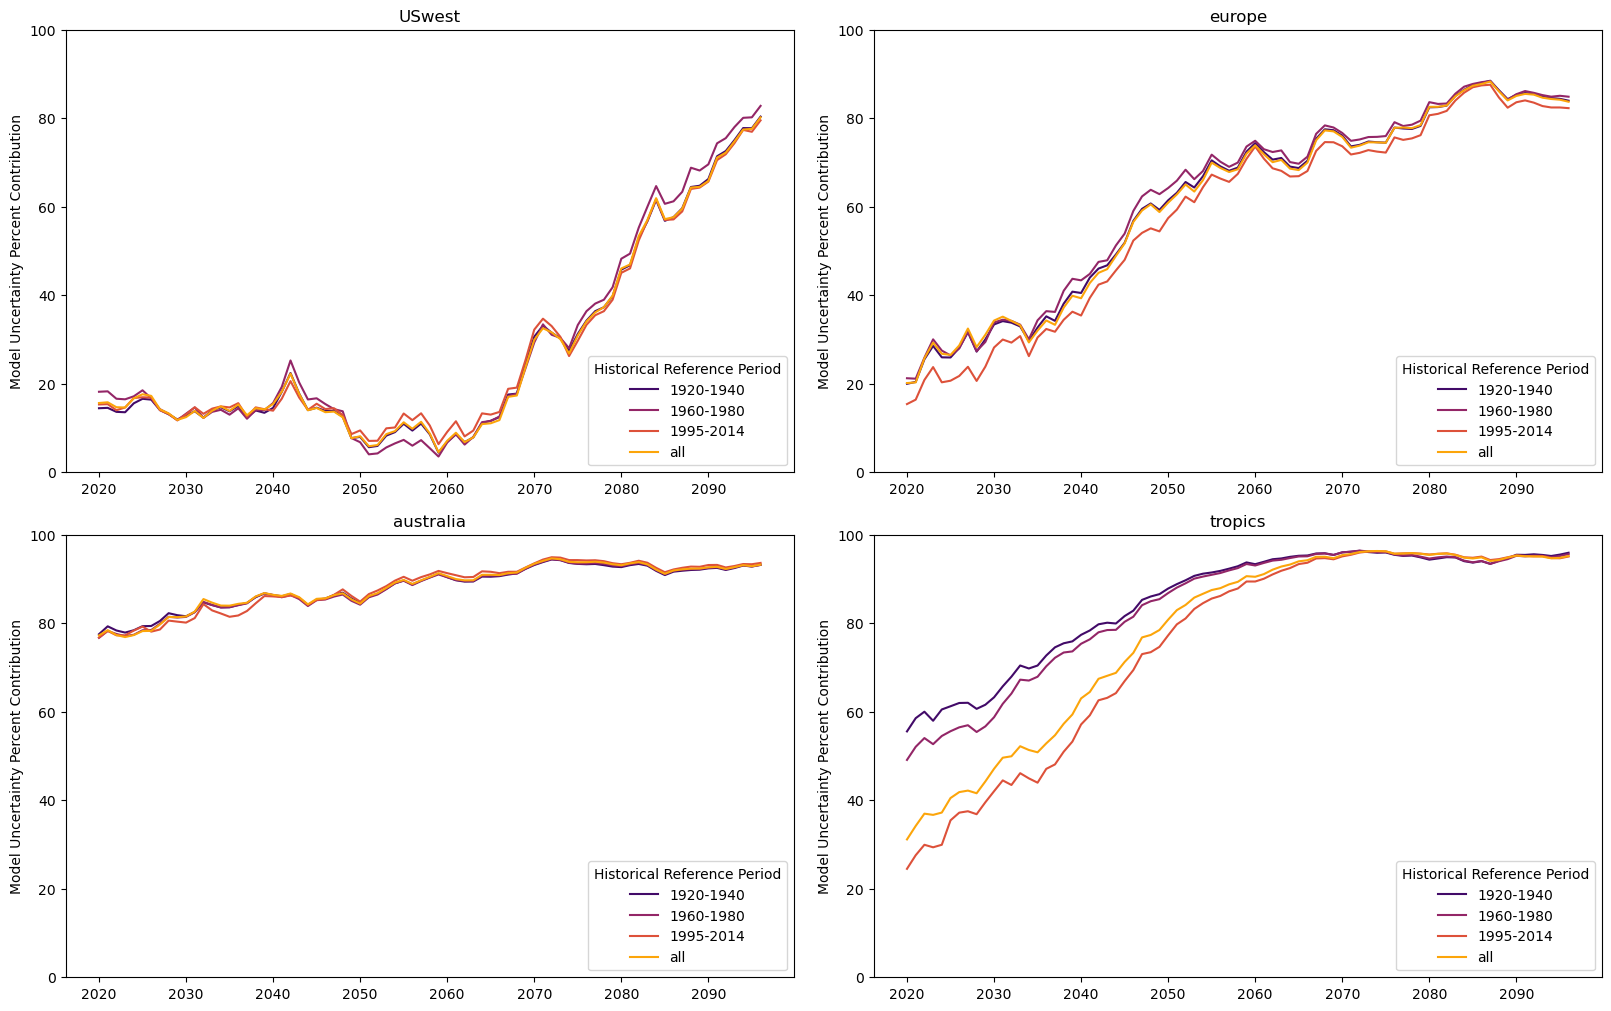

In [101]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_qdm.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_qdm.concat_dim)):
        axe.plot(test_histslice_qdm.sel(region=r).isel(concat_dim=i).time,test_histslice_qdm.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')

In [51]:
test_histslice_qdm_true = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1995','2014'),
                                                              slice(None, None)],
                                               'postprocess':True},
                                        regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]
                                       )

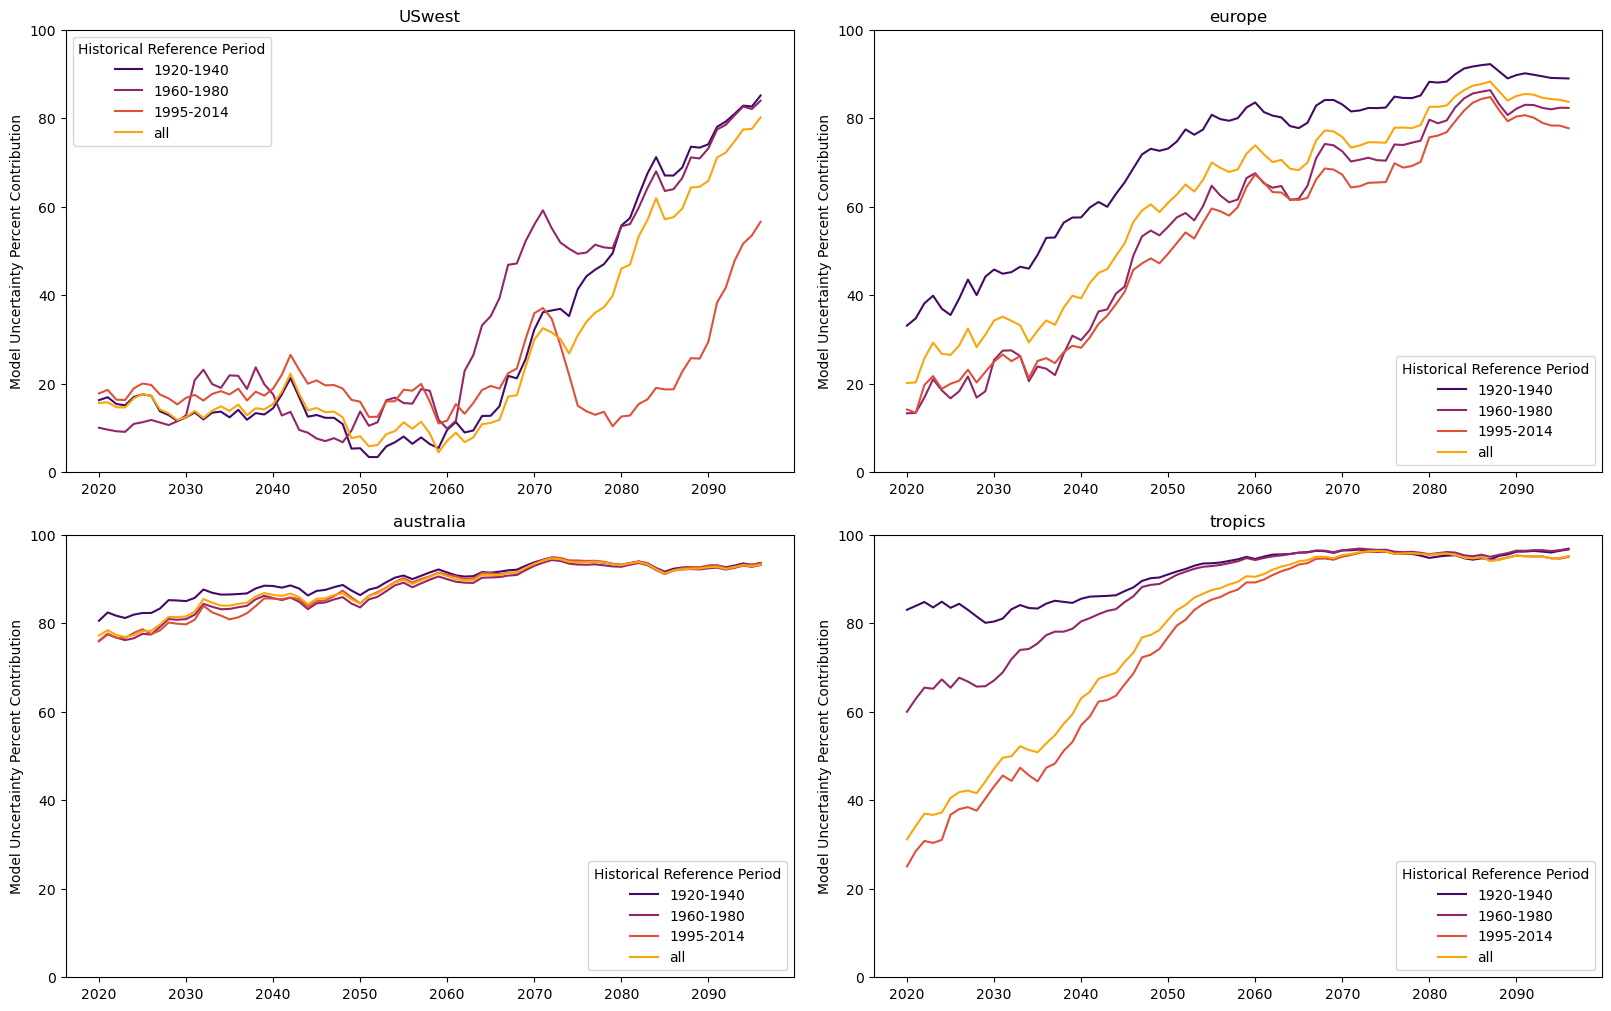

In [102]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
colors = sns.color_palette("inferno", len(test_histslice_qdm_true.concat_dim))

regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice_qdm_true.concat_dim)):
        axe.plot(test_histslice_qdm_true.sel(region=r).isel(concat_dim=i).time,test_histslice_qdm_true.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        labels = ['1920-1940','1960-1980','1995-2014','all']
    if r == 'USwest':
        axe.legend(labels=labels,loc=2,title='Historical Reference Period')
    else:
        axe.legend(labels=labels,loc=4,title='Historical Reference Period')



In [87]:
range(len(test_histslice_qdm_true.concat_dim))

range(0, 4)

In [53]:
internal_qdm_False = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':False,
                                    },
                                    regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]

                           )

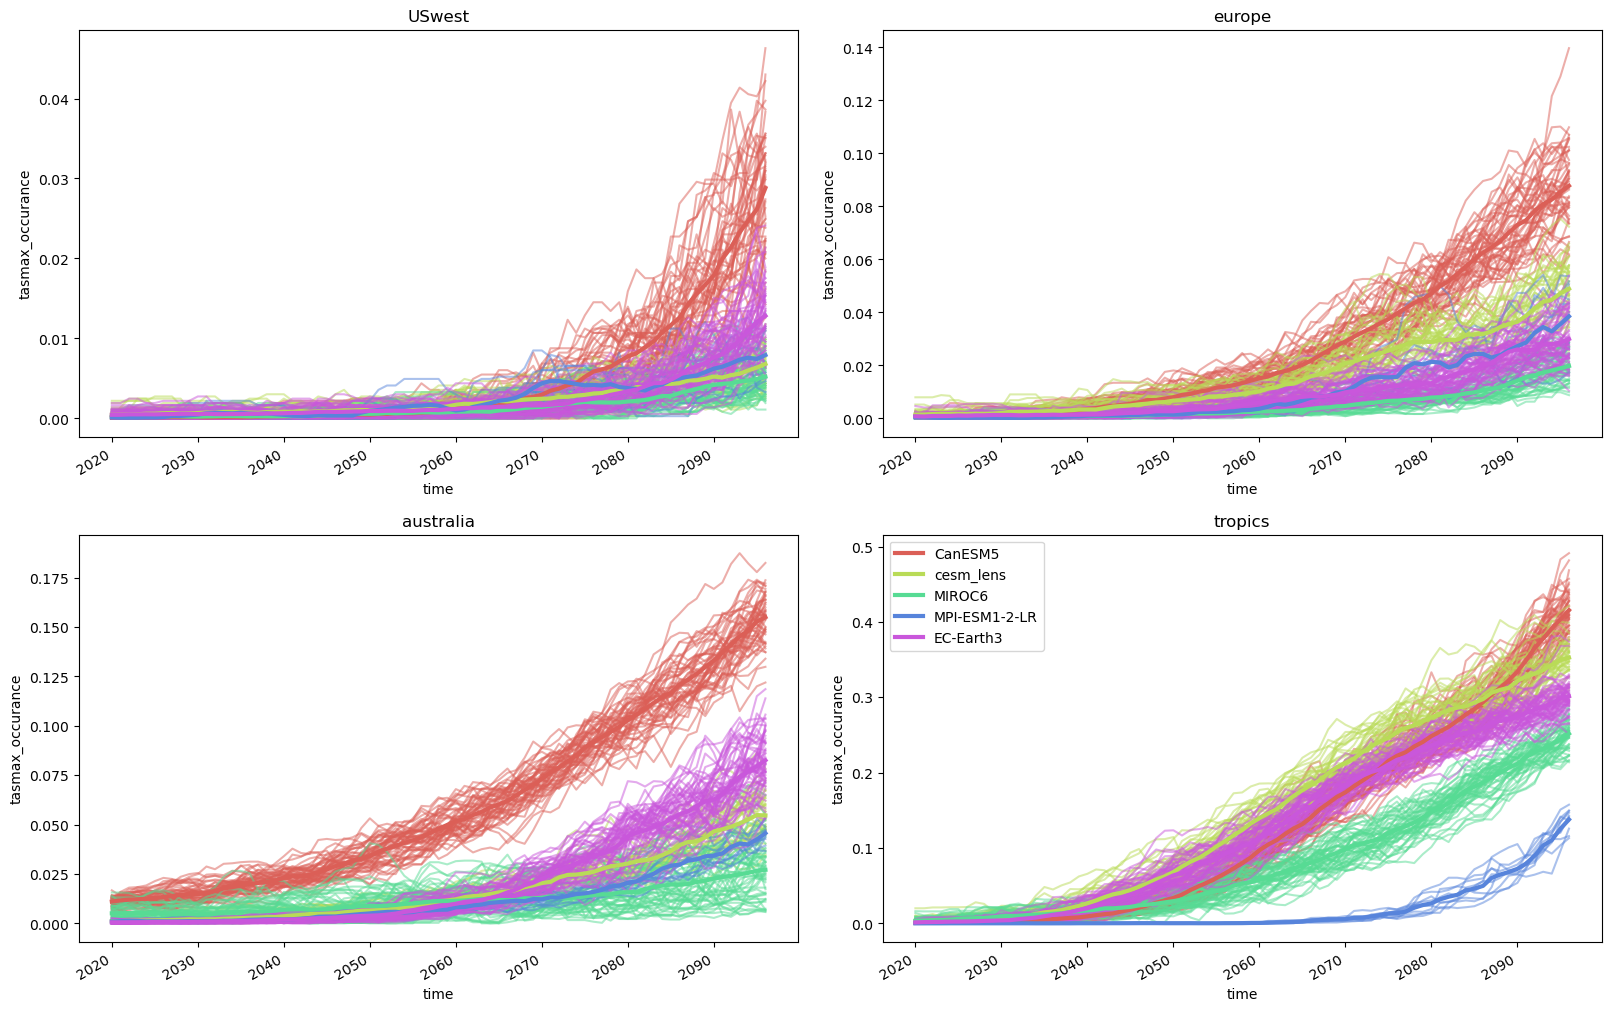

In [107]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_qdm_False[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_qdm_False[variable+'_occurance'].model):
        m = internal_qdm_False.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)        
plt.legend()

In [61]:
internal_qdm_True = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True,
                                    },
                                    regions = [USwest_qdm,europe_qdm,australia_qdm,tropics_qdm]

                           )

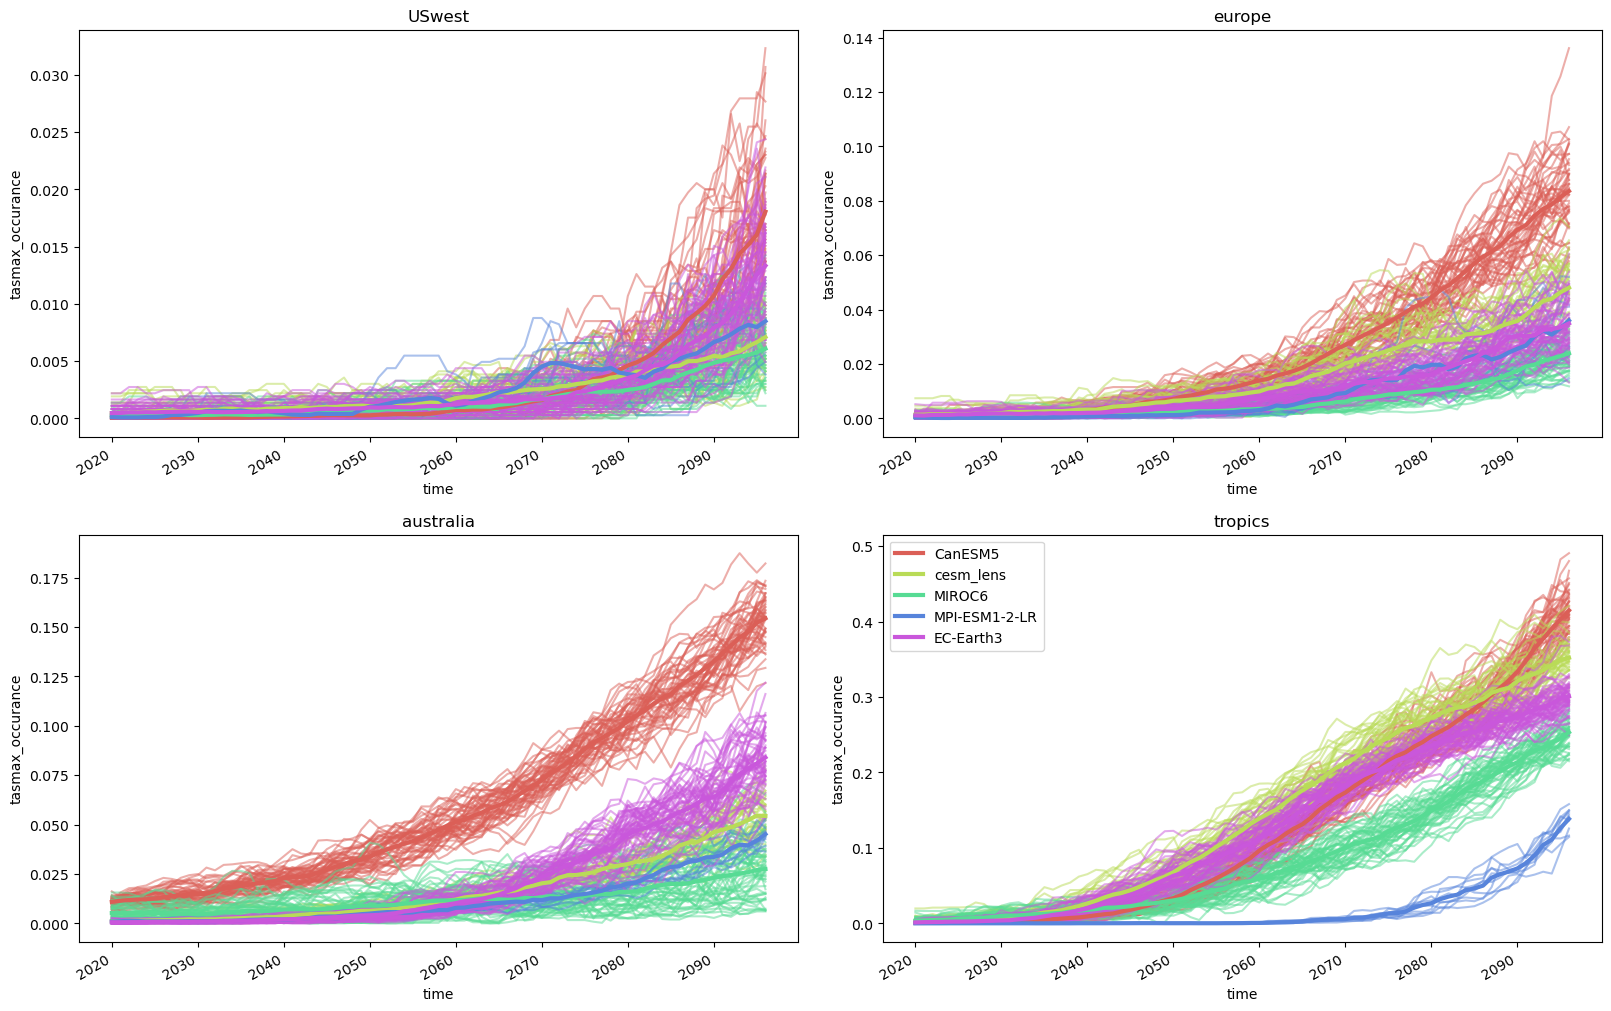

In [106]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_qdm_True[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_qdm_True[variable+'_occurance'].model):
        m = internal_qdm_True.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

In [109]:
internal_true = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True,
                                    },
                                    regions = [USwest,europe,australia,tropics]
                           )

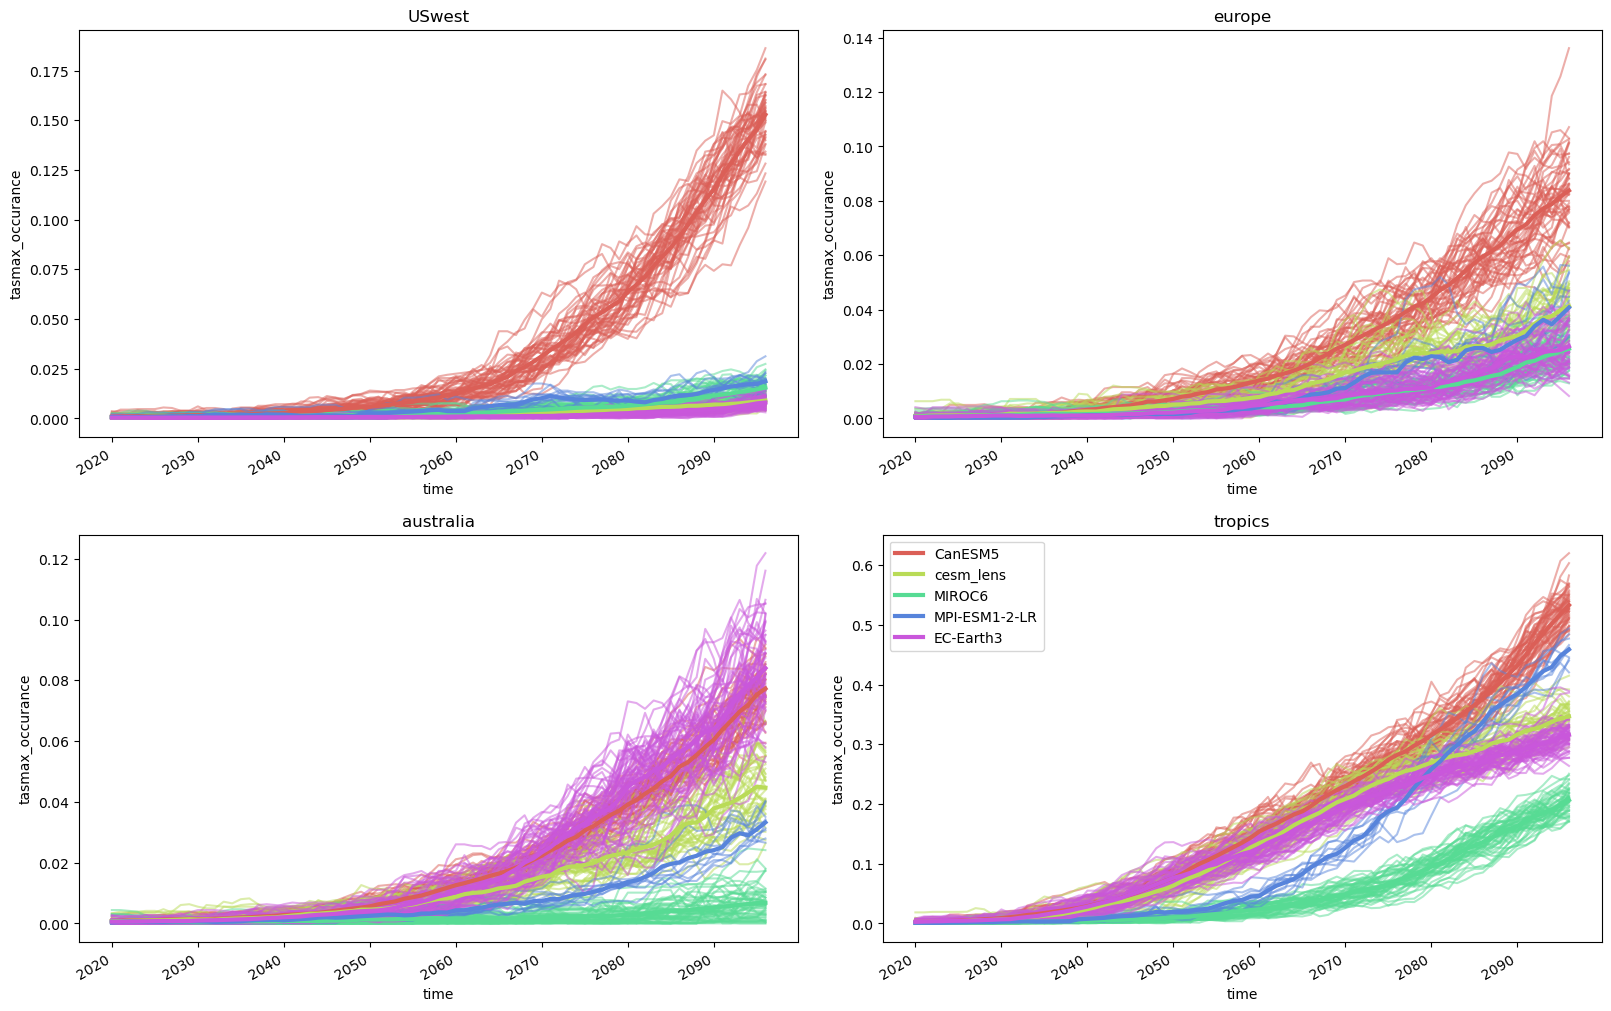

In [110]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_true[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_true[variable+'_occurance'].model):
        m = internal_true.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

In [63]:
internal_false = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':False,
                                    },
                                    regions = [USwest,europe,australia,tropics]
                           )

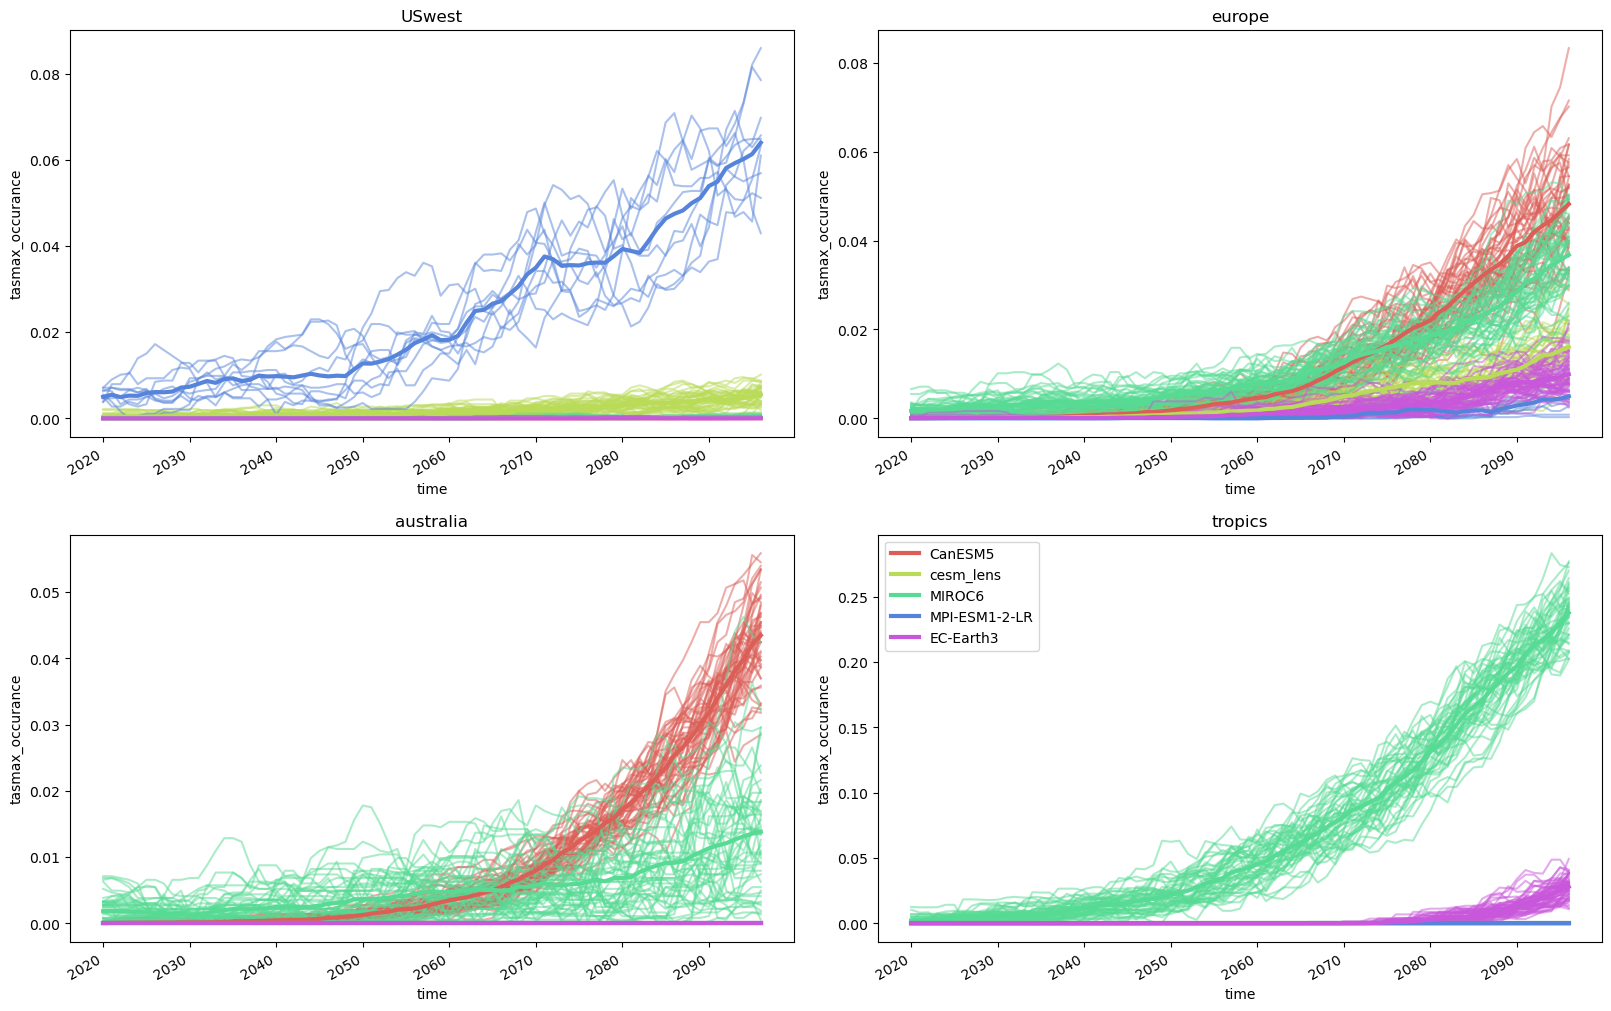

In [111]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("hls", len(internal_false[variable+'_occurance'].model))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USwest','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_false[variable+'_occurance'].model):
        m = internal_false.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

In [122]:
q =0.5
print(f'USwest, quantile = {q}')
print(f"QDM quantile (no post-p) = {USwest_qdm.hist.tasmax.quantile(q, ('member', 'time', 'model')).values}")
print(f"QDM quantile (post-p) = {USwest_qdm.hist.tasmax.quantile(q, ('member', 'time')).values}")
print(f"Raw quantile (no post-p) = {USwest.hist.tasmax.quantile(q, ('member', 'time', 'model')).values}")
print(f"Raw quantile (post-p) = {USwest.hist.tasmax.quantile(q, ('member', 'time')).values}")

USwest, quantile = 0.5
QDM quantile (no post-p) = 16.26459002494812
QDM quantile (post-p) = [16.2645911  16.26459002 16.26459479 16.26459002 16.26458949]
Raw quantile (no post-p) = 17.91644287109375
Raw quantile (post-p) = [15.51890564 19.68762207 19.16503906 18.10693359 16.61550903]
